In [1]:
import pandas as pd

crime_df = pd.read_csv("recorded_crime_ireland .csv")

crime_df['Quarter'] = pd.to_datetime(crime_df['Quarter'])
crime_df.set_index('Quarter', inplace=True)
df_total_crimes = crime_df.groupby(pd.Grouper(freq='Q')).sum()['VALUE']
crime_df = pd.DataFrame({'Quarter': df_total_crimes.index, 'Total Crimes': df_total_crimes.values})
crime_df

crime_df = crime_df[crime_df['Quarter'] >= '2020Q1']
crime_df



C:\Users\buckl\AppData\Local\Temp/ipykernel_20296/4269054278.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total_crimes = crime_df.groupby(pd.Grouper(freq='Q')).sum()['VALUE']


,Quarter,Total Crimes
68,2020-03-31,98909
69,2020-06-30,85465
70,2020-09-30,99022
71,2020-12-31,86302
72,2021-03-31,80416
73,2021-06-30,89373
74,2021-09-30,93887
75,2021-12-31,96755
76,2022-03-31,95945
77,2022-06-30,105111


In [2]:
covid_df = pd.read_csv("COVID-19_NOCA_ICUBIS_Historic_Time_Series.csv")

covid_df['extract'] = pd.to_datetime(covid_df['extract'])


covid_df.set_index('extract', inplace=True)


quarterly_cases = covid_df['ncovidconf'].resample('Q').sum()

covid_df = pd.DataFrame({'Quarter': quarterly_cases.index, 'Cases': quarterly_cases.values})
covid_df = covid_df[covid_df['Quarter'] <= '2022Q4']
covid_df



,Quarter,Cases
0,2020-03-31 00:00:00+00:00,471
1,2020-06-30 00:00:00+00:00,6622
2,2020-09-30 00:00:00+00:00,789
3,2020-12-31 00:00:00+00:00,3006
4,2021-03-31 00:00:00+00:00,12345
5,2021-06-30 00:00:00+00:00,3337
6,2021-09-30 00:00:00+00:00,3850
7,2021-12-31 00:00:00+00:00,8853
8,2022-03-31 00:00:00+00:00,5796
9,2022-06-30 00:00:00+00:00,3067


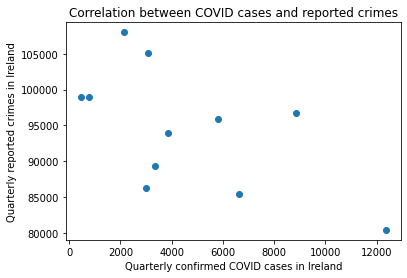

In [3]:
from matplotlib import pyplot as plt
plt.scatter(covid_df["Cases"], crime_df["Total Crimes"])
plt.xlabel('Quarterly confirmed COVID cases in Ireland')
plt.ylabel('Quarterly reported crimes in Ireland')
plt.title('Correlation between COVID cases and reported crimes')
quarters = pd.date_range(start='2020-03-31', end='2022-09-30', freq='Q')


plt.show()



In [4]:
import numpy as np

x = np.array(covid_df["Cases"])
y = np.array(crime_df["Total Crimes"])

corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0, 1]

corr

-0.5975063187489282